# 📅 Day 10: **Rate Limiting + Real-Time APIs (Stocks, Crypto, etc.)**

> Core Concept: Understand API rate limits, how to handle them, and how real-time APIs work for things like stocks, crypto, or weather.


---

## 🔍 Today's Learning

| Concept | Description |
| --- | --- |
| ⏳ Rate Limiting | APIs limit how often you can make requests — to avoid overload |
| ⚠ Handling Limit Errors | How to handle status codes like `429 Too Many Requests` |
| ⌛ Retry Logic | Using `time.sleep()` or `Retry-After` headers |
| 📈 Real-Time APIs | Stock price, crypto, or other fast-changing data |
| 📊 Auto-refreshing | Basic techniques to re-fetch or update data periodically |

## 🧠 Analogy:

Think of API calls like tokens in an arcade 🎟️  
You get a fixed number per minute/hour — if you overuse them, you have to **wait** or **buy more**.

---

## 🛠 Key API Response Headers You Should Know:

```http
X-RateLimit-Limit: 60
X-RateLimit-Remaining: 58
X-RateLimit-Reset: 1372700873

```

- `429` = Too Many Requests
- `Retry-After` = How many seconds to wait

---

## 🔧 Python Example – Handle Rate Limit

In [1]:
import requests
import time

url = "https://api.github.com/users/the-coding-train/repos"

while True:
    response = requests.get(url)
    
    if response.status_code == 429:
        print("Rate Limiting Reached/Hit. Sleeping...")
        time.sleep(60)
        continue
    
    data = response.json()
    break

print("Fetched:", len(data), "repos")

Fetched: 3 repos


---

## 🔄 Realtime APIs — Example

### 🎯 Use this crypto API:

```http
https://api.coingecko.com/api/v3/simple/price?ids=bitcoin,ethereum&vs_currencies=usd

```

🔁 Try updating it every 10 seconds.

In [2]:
import requests
import time

url = 'https://api.coingecko.com/api/v3/simple/price?ids=bitcoin,ethereum&vs_currencies=usd'

while True:
    res = requests.get(url)
    
    if res.status_code == 429:
        print("Rate Limiting Reached/Hit. Sleeping...")
        time.sleep(10)
        break
    
    print(res.json())
    time.sleep(10)

{'bitcoin': {'usd': 118970}, 'ethereum': {'usd': 3872.06}}
{'bitcoin': {'usd': 118970}, 'ethereum': {'usd': 3872.06}}
{'bitcoin': {'usd': 118970}, 'ethereum': {'usd': 3872.06}}
{'bitcoin': {'usd': 118970}, 'ethereum': {'usd': 3872.06}}
{'bitcoin': {'usd': 118970}, 'ethereum': {'usd': 3872.06}}
Rate Limiting Reached/Hit. Sleeping...


---

### Task :

In [ ]:
url = 'https://api.github.com/users/octocat'

response = requests.get(url)

print(response.headers['X-RateLimit-Limit'])
print(response.headers['X-RateLimit-Remaining'])


real_time = float(response.headers['X-RateLimit-Reset'])
print(real_time)
time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(real_time))

# Use time.gmtime(timestamp) instead of localtime() if you want UTC instead of local time.

60
32
1753780256.0


'2025-07-29 14:40:56'

In [47]:
import requests
import time

url = 'https://api.coingecko.com/api/v3/simple/price?ids=bitcoin,ethereum&vs_currencies=usd'

while True:
    res = requests.get(url)
    
    if res.status_code == 429:
        print("Rate Limiting Reached/Hit. Sleeping...")
        time.sleep(10)
        break
    
    data = res.json()

    print(time.strftime("%Y-%m-%d %H:%M:%S",time.localtime(time.time())))
    print('bitcoin : ', data['bitcoin'])
    print('ethereum : ', data['ethereum'])
    time.sleep(10)

2025-07-29 14:07:43
bitcoin :  {'usd': 118869}
ethereum :  {'usd': 3869.16}
2025-07-29 14:07:53
bitcoin :  {'usd': 118876}
ethereum :  {'usd': 3870.7}
2025-07-29 14:08:03
bitcoin :  {'usd': 118876}
ethereum :  {'usd': 3870.7}
2025-07-29 14:08:14
bitcoin :  {'usd': 118876}
ethereum :  {'usd': 3870.7}
2025-07-29 14:08:24
bitcoin :  {'usd': 118876}
ethereum :  {'usd': 3870.7}
2025-07-29 14:08:34
bitcoin :  {'usd': 118876}
ethereum :  {'usd': 3870.7}
2025-07-29 14:08:44
bitcoin :  {'usd': 118876}
ethereum :  {'usd': 3870.7}
Rate Limiting Reached/Hit. Sleeping...



14:15:46 | BTC: $118927
14:15:56 | BTC: $118927
14:16:06 | BTC: $118927
14:16:16 | BTC: $118927
14:16:26 | BTC: $118927
14:16:37 | BTC: $118927
14:16:47 | BTC: $118930
Rate limit hit. Sleeping for 60 seconds...
14:17:58 | BTC: $118941
14:18:08 | BTC: $118941
14:18:18 | BTC: $118941
14:18:28 | BTC: $118941
14:18:38 | BTC: $118941
14:18:48 | BTC: $118941
14:18:59 | BTC: $118947
Rate limit hit. Sleeping for 60 seconds...
14:20:09 | BTC: $118953
14:20:20 | BTC: $118953
14:20:30 | BTC: $118953
14:20:40 | BTC: $118953
14:20:50 | BTC: $118953
14:21:00 | BTC: $118953
14:21:11 | BTC: $118953
Rate limit hit. Sleeping for 60 seconds...
14:22:21 | BTC: $118946
14:22:31 | BTC: $118946
14:22:41 | BTC: $118946
14:22:51 | BTC: $118946
14:23:02 | BTC: $118946
14:23:12 | BTC: $118946


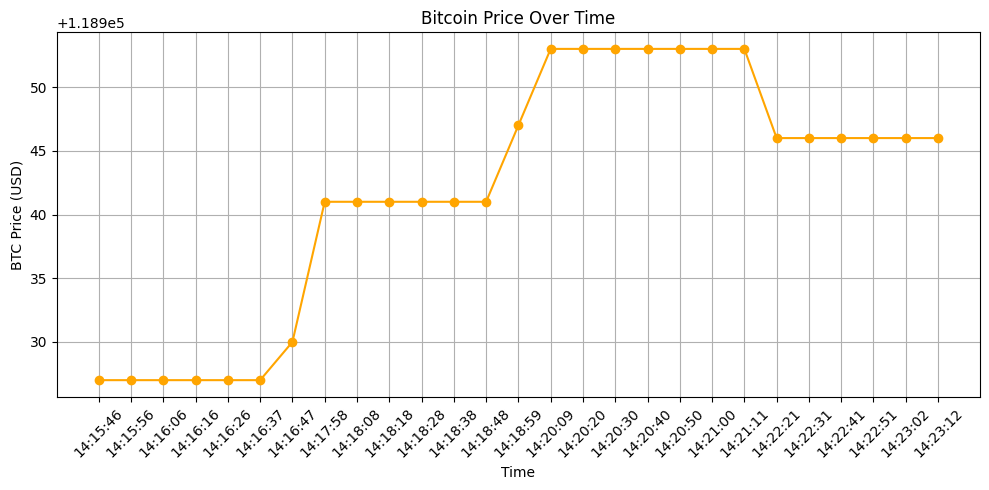

In [54]:
import requests
import time
import matplotlib.pyplot as plt
from datetime import datetime

# Set the API URL
url = 'https://api.coingecko.com/api/v3/simple/price?ids=bitcoin&vs_currencies=usd'

# Number of data points and interval in seconds
total_points = 30      # e.g., for ~5 minutes with 10 sec intervals
interval = 10

timestamps = []
btc_prices = []

print(f"Collecting BTC prices every {interval} seconds...\n")

for i in range(total_points):
    try:
        res = requests.get(url)
        
        if res.status_code == 429:
            print("Rate limit hit. Sleeping for 60 seconds...")
            time.sleep(60)
            continue
        
        data = res.json()
        price = data['bitcoin']['usd']
        current_time = datetime.now().strftime("%H:%M:%S")

        timestamps.append(current_time)
        btc_prices.append(price)

        print(f"{current_time} | BTC: ${price}")
        time.sleep(interval)

    except Exception as e:
        print("Error:", e)
        time.sleep(interval)

# Plot after collecting all data
plt.figure(figsize=(10, 5))
plt.plot(timestamps, btc_prices, marker='o', linestyle='-', color='orange')
plt.title("Bitcoin Price Over Time")
plt.xlabel("Time")
plt.ylabel("BTC Price (USD)")
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
def make_request_with_retry(url, headers=None):
    retries = 5
    delay = 1

    for attempt in range(retries):
        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            return response.json()

        elif response.status_code == 429:
            print(f"[Retry {attempt+1}] Rate limit hit! Waiting...")
            retry_after = response.headers.get("Retry-After")
            wait_time = int(retry_after) if retry_after else delay
            time.sleep(wait_time)
            delay *= 2  # exponential

        else:
            print("Other error:", response.status_code)
            break

    print("Failed after multiple retries.")
    return None


---

## 📝 Summary:

| Skill | Practiced |
| --- | --- |
| ⏱ Rate limiting | Checked limits via headers |
| 🧠 Retry logic | `time.sleep()` if 429 error |
| 🔁 Real-time fetching | Periodic requests for updates |
| 📈 Optional plotting | Visualize real-time price changes |